# Finding the Maximum Sharpe Ratio Portfolio!

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import stark



In [2]:
ind_returns = stark.get_ind_returns()
annualized_ret = stark.calculate_annualize_rets(
    ind_returns["1996":"2000"],
    12
)
covariance_matrix = ind_returns["1996":"2000"].cov()

In [9]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize


def msr(risk_free_rate, returns_data, cov_matrix):
    """
    Risk Free Rate + ER + COV -> W
    """
    num_assets = len(returns_data)
    unit_weight = 1 / num_assets
    init_guess = np.repeat(unit_weight, num_assets)
    
    bounds = ((0.0, 1.0),) * num_assets
    
    weights_sum_to_one = {
        "type": "eq",
        "fun": lambda weights: np.sum(weights) - 1
    }
    
    def neg_sharpe_ratio(weights, risk_free_rate, returns_data, cov_matrix):
        """
        Returns the negative of the sharpe ratio, given the weights
        """
        returns = stark.calculate_portfolio_return(weights, returns_data)
        volatility = stark.calculate_portfolio_vol(weights, cov_matrix)
        
        return -(returns - risk_free_rate) / volatility
    
    results = minimize(
        neg_sharpe_ratio, 
        init_guess, 
        args = (
            risk_free_rate, 
            returns_data,
            cov_matrix,),
        method = "SLSQP",
        options = {"disp": False},
        constraints = (weights_sum_to_one), 
        bounds = bounds
    )
    
    return results.x


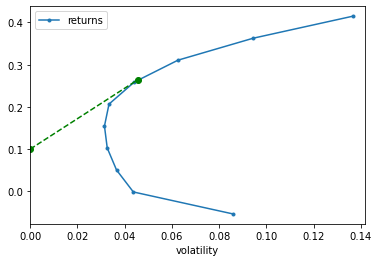

In [12]:
ax = stark.plot_ef(
    10, 
    annualized_ret, 
    covariance_matrix
)
ax.set_xlim(left=0)

risk_free_value = 0.1

weights_msr = stark.msr(
    risk_free_value, 
    annualized_ret, 
    covariance_matrix
)

returns_msr = stark.calculate_portfolio_return(
    weights_msr, 
    annualized_ret
)

volatility_msr = stark.calculate_portfolio_vol(
    weights_msr, 
    covariance_matrix
)

# add capital market line
cml_x = [0, volatility_msr]
cml_y = [risk_free_value, returns_msr]
ax.plot(
    cml_x, 
    cml_y, 
    color="green", 
    marker="o", 
    linestyle="dashed"
)

<AxesSubplot:xlabel='volatility'>

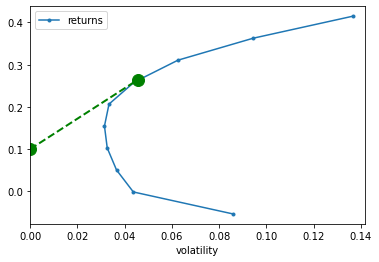

In [13]:
stark.plot_ef(
    10, 
    annualized_ret, 
    covariance_matrix, 
    show_cml = True, 
    risk_free_rate = 0.1
)